# EDA

In [45]:
%pip install -r requirements.txt

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/cd/7a/19fe32c810c5ceddafcfda16276d98df299c8649e24e84d4f00df4a91e01/scikit_learn-1.5.2-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/ed/05/7f03e680cc5249c4f96c9e4e845acde08eb1aee5bc216eff8a089baa4ddb/scipy-1.14.1-cp311-cp311-macosx_14_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.1 MB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.

## Imports

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Read data

Some notes on the weather data:  
`QV2M` - Specific humidity at 2 meters  
`T2M` - Temperature at 2 meters  
`T2MWET` - Wet bulb temeprature at 2 meters  
`WS2M` - Wind speed at 2 meters  
`ALLSKY_SFC_UV_INDEX` - All sky surface UV index  
`T2MDEW` - Dew/frost point at 2 meters  
`TS` - Earth skin temperature  
`ALLSKY_SFC_UVB` - All sky surface UVB irradiance  
`T2M_RANGE` - Temperature at 2 meters range  
`RH2M` - Relative humidity at 2 meters  
`CLRSKY_SFC_SW_DWN` - Clear sky surface shortwave downward irradiance  

In [41]:
PATH = r'/Users/asmit/Documents/Fall24_Classes/SDS336/Austin_Trees/weather_data/'
weather = pd.DataFrame()
files = os.listdir(PATH)

# Read each file
for file in files:
    weather = pd.concat([weather, pd.read_csv(PATH + file)])

# Check that expected matches actual
weather.reset_index(inplace=True)
expected_row_count = 2808 * weather['YYYYMMDD'].nunique() # Num of pulls/day * num of days
weather['YYYYMMDD'] = pd.to_datetime(weather['YYYYMMDD'], format='ISO8601')
weather = weather.drop(columns=['index'])
print(f'Read {len(files)} files | Expected {expected_row_count} rows')
print(f'Shape: {weather.shape}')
weather.head()

Read 59 files | Expected 174096 rows
Shape: (174096, 19)


,LON,LAT,YEAR,MM,DD,DOY,YYYYMMDD,QV2M,T2M,T2MWET,WS2M,ALLSKY_SFC_UV_INDEX,T2MDEW,TS,ALLSKY_SFC_UVB,ALLSKY_SFC_UVA,T2M_RANGE,RH2M,CLRSKY_SFC_SW_DWN
0,-97.697313,30.251707,2024,9,18,262,2024-09-18,18.68,29.22,26.49,2.38,NaN,23.76,30.43,NaN,NaN,11.24,75.38,NaN
1,-97.672401,30.328069,2024,9,18,262,2024-09-18,18.68,29.22,26.49,2.38,NaN,23.76,30.43,NaN,NaN,11.24,75.38,NaN
2,-97.721013,30.236494,2024,9,18,262,2024-09-18,19.59,28.96,26.79,2.12,NaN,24.62,29.88,NaN,NaN,10.18,79.50,NaN
3,-97.719236,30.373732,2024,9,18,262,2024-09-18,18.68,29.22,26.49,2.38,NaN,23.76,30.43,NaN,NaN,11.24,75.38,NaN
4,-97.740475,30.279196,2024,9,18,262,2024-09-18,18.68,29.22,26.49,2.38,NaN,23.76,30.43,NaN,NaN,11.24,75.38,NaN


## Basic EDA

Checking dtypes, missing values, summary statistics

In [28]:
weather.dtypes

LON                           float64
LAT                           float64
YEAR                            int64
MM                              int64
DD                              int64
DOY                             int64
YYYYMMDD               datetime64[ns]
QV2M                          float64
T2M                           float64
T2MWET                        float64
WS2M                          float64
ALLSKY_SFC_UV_INDEX           float64
T2MDEW                        float64
TS                            float64
ALLSKY_SFC_UVB                float64
ALLSKY_SFC_UVA                float64
T2M_RANGE                     float64
RH2M                          float64
CLRSKY_SFC_SW_DWN             float64
dtype: object

In [29]:
weather.isnull().sum()

LON                        0
LAT                        0
YEAR                       0
MM                         0
DD                         0
DOY                        0
YYYYMMDD                   0
QV2M                       0
T2M                        0
T2MWET                     0
WS2M                       0
ALLSKY_SFC_UV_INDEX    39312
T2MDEW                     0
TS                         0
ALLSKY_SFC_UVB         33696
ALLSKY_SFC_UVA         33696
T2M_RANGE                  0
RH2M                       0
CLRSKY_SFC_SW_DWN      28080
dtype: int64

In [32]:
# No need to look at some columns
weather.drop(columns=['LON', 'LAT', 'YEAR', 'MM', 'DD', 'DOY', 'YYYYMMDD']).describe() # Drop geo/date-related cols

,QV2M,T2M,T2MWET,WS2M,ALLSKY_SFC_UV_INDEX,T2MDEW,TS,ALLSKY_SFC_UVB,ALLSKY_SFC_UVA,T2M_RANGE,RH2M,CLRSKY_SFC_SW_DWN
count,174096.000000,174096.000000,174096.000000,174096.000000,134784.000000,174096.000000,174096.000000,140400.000000,140400.000000,174096.000000,174096.000000,146016.000000
mean,13.746822,26.902507,22.360760,2.833357,2.098542,17.821029,28.078880,0.407400,15.096800,12.672400,63.630671,7.178846
std,4.072527,5.308416,4.979564,1.144706,0.643800,5.829894,5.871277,0.115062,3.709923,3.628676,15.531523,0.682032
min,3.110000,12.210000,4.850000,1.030000,0.600000,-2.910000,12.770000,0.120000,4.700000,3.160000,24.440000,5.590000
25%,10.930000,24.420000,20.710000,1.950000,1.632500,15.050000,24.900000,0.330000,12.330000,10.110000,51.690000,6.702500
50%,14.340000,27.720000,24.230000,2.550000,1.990000,19.400000,28.760000,0.390000,15.585000,13.170000,64.440000,7.200000
75%,16.420000,31.420000,25.730000,3.550000,2.562500,21.680000,33.490000,0.500000,18.350000,15.420000,76.620000,7.795000
max,21.480000,35.140000,27.760000,6.400000,3.440000,26.060000,38.120000,0.620000,20.570000,19.590000,93.120000,8.380000


<Axes: >

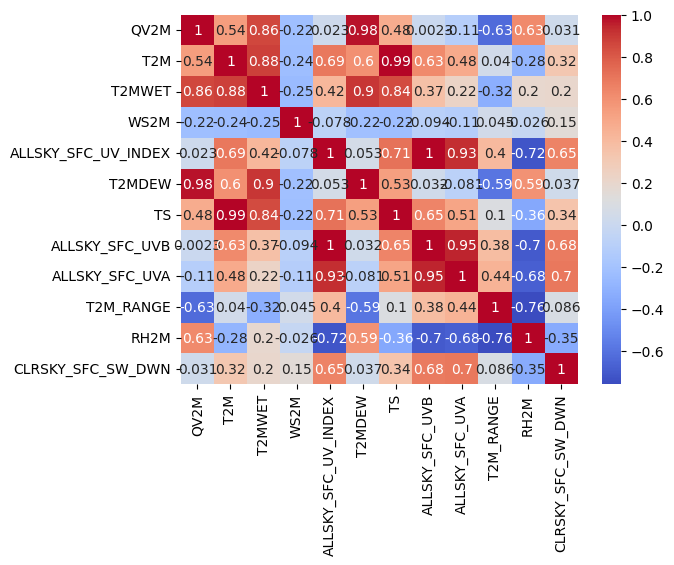

In [58]:
sns.heatmap(corr, annot=True, cmap='coolwarm')

<Figure size 1000x600 with 0 Axes>

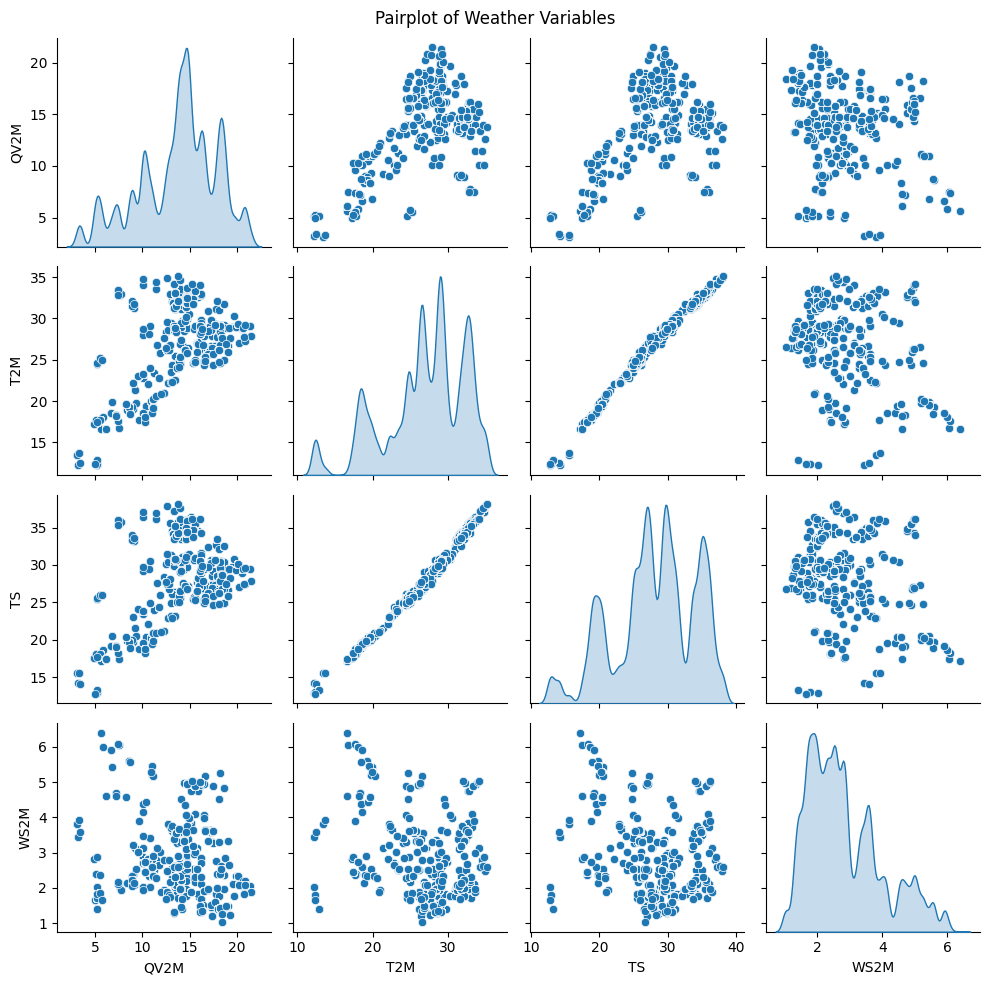

In [74]:
plt.figure(figsize=(10, 6))
p = sns.pairplot(weather[['QV2M', 'T2M', 'TS', 'WS2M']], diag_kind='kde')
p.fig.suptitle('Pairplot of Weather Variables')
plt.tight_layout()
plt.show()

In [49]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Dictionary to store the number of components for each date
components_per_date = {}

# Define the threshold for explained variance
explained_variance_threshold = 0.95

# Iterate over each unique date in the dataset
for date, group in weather.groupby('YYYYMMDD'):
    # Extract features (excluding columns that are not relevant for PCA)
    features = group.drop(columns=['LON', 'LAT', 'YEAR', 'MM', 'DD', 'DOY', 'YYYYMMDD'])
    
    # Standardize the features
    scaler = StandardScaler()
    standardized_features = scaler.fit_transform(features)
    
    # Apply PCA
    pca = PCA()
    pca.fit(standardized_features)
    
    # Calculate the cumulative explained variance ratio
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    
    # Find the number of components that explain at least 95% of the variance
    num_components = np.argmax(cumulative_variance >= explained_variance_threshold) + 1
    components_per_date[date] = num_components

Explained variance with 1 components: 0.700605814127169
Explained variance with 2 components: 0.9818913818892705
Explained variance with 3 components: 0.994637616627731
Explained variance with 4 components: 0.9977640816045918
